In [ ]:
%pip install pandas

In [2]:
import pandas as pd

# Load the dataset
url = "https://raw.githubusercontent.com/IQTLabs/software-supply-chain-compromises/master/software_supply_chain_attacks.csv"
df = pd.read_csv(url)

In [3]:
# Filter open-source attacks based on technology
open_source_attacks = df[df["technology"].isin(["npm", "PyPI", "Docker Hub", "NuGet", "RubyGems", "Packagist"])]

# Count open-source attacks
num_open_source_attacks = open_source_attacks.shape[0]
total_attacks = df.shape[0]

# Calculate percentage of open-source attacks
percentage_open_source = round(num_open_source_attacks / total_attacks * 100, 2)

# Print results
print(f"Number of open-source attacks: {num_open_source_attacks}")
print(f"Percentage of attacks from open-source packages: {percentage_open_source}%")

Number of open-source attacks: 41
Percentage of attacks from open-source packages: 22.4%



Top 5 attack categories for open-source packages:
attack_minor_category
Typosquatting                    17
Malicious Package                15
Dependency Compromise             4
Source Code System Compromise     2
Software Registry Attacks         2
Name: count, dtype: int64


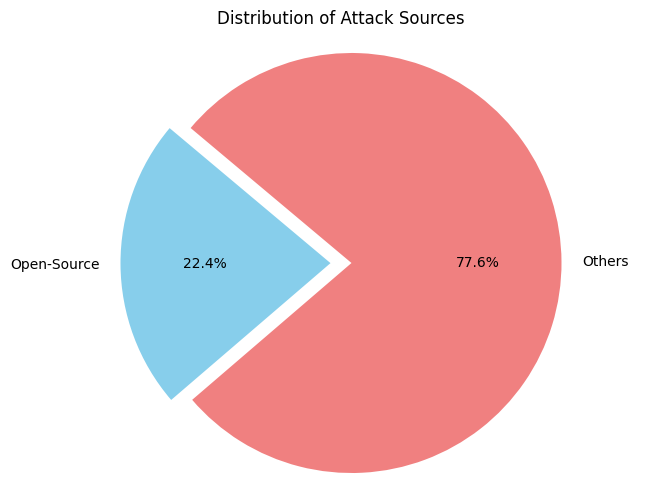

In [4]:
# Analyze attack categories (optional)
from collections import Counter

attack_categories = open_source_attacks["attack_minor_category"].value_counts()
print(f"\nTop 5 attack categories for open-source packages:")
print(attack_categories.head())

# Visualize the results (optional)
import matplotlib.pyplot as plt

labels = ["Open-Source", "Others"]
sizes = [num_open_source_attacks, total_attacks - num_open_source_attacks]
colors = ["skyblue", "lightcoral"]

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=(0.1, 0), labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Attack Sources")
plt.axis("equal")
plt.show()


This code will generate bar plots for the impact, attack vectors, and targets of the attacks, and a line plot for the number of attacks over time. 

In [ ]:
%pip install pandas
%pip install matplotlib

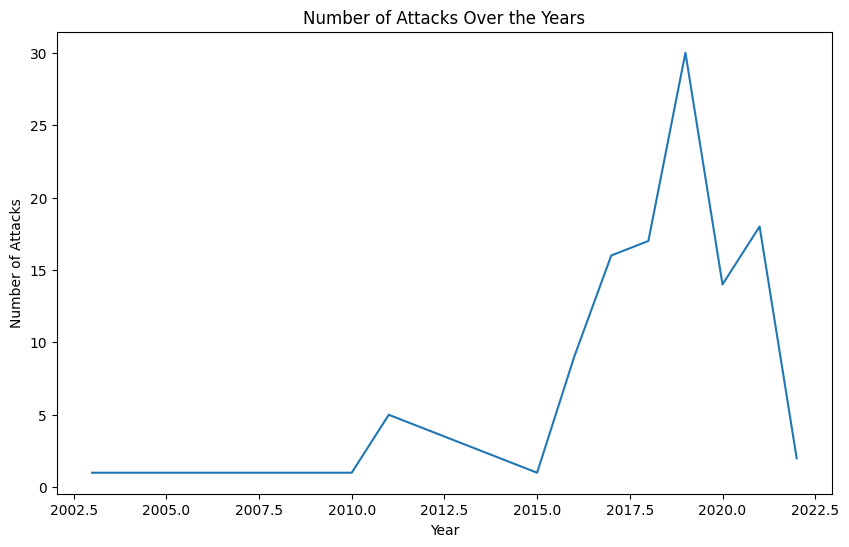

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
url = "https://raw.githubusercontent.com/IQTLabs/software-supply-chain-compromises/master/software_supply_chain_attacks.csv"
data = pd.read_csv(url)

# Convert the 'detection_date' column to datetime format, errors='coerce' will convert invalid dates to NaT
data['detection_date'] = pd.to_datetime(data['detection_date'], errors='coerce')

# Drop the rows where 'detection_date' is NaT (Not a Time)
data = data.dropna(subset=['detection_date'])

# Trend Analysis
data['year'] = data['detection_date'].dt.year
trend = data['year'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
trend.plot(kind='line')
plt.title('Number of Attacks Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Attacks')
plt.show()
